In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> INSIGHT NO.1</h1>

<h3> Which region recorded the highest number of dengue cases in 2016, and how does it compare to other regions?" </h3>

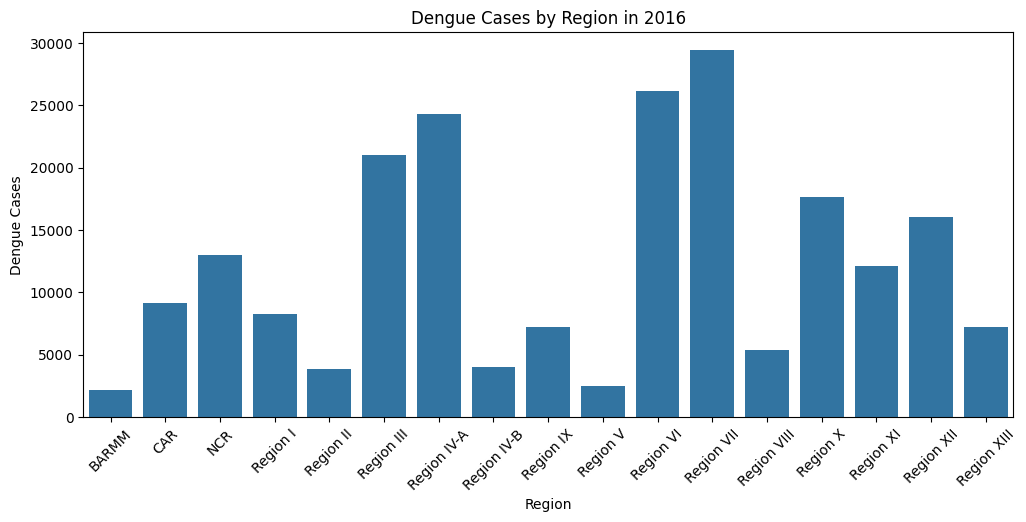

In [5]:
region_2016 = dengue[dengue['Year'] == 2016].groupby('Region')['Dengue_Cases'].sum()
plt.figure(figsize=(12, 5))
sns.barplot(x=region_2016.index, y=region_2016.values)
plt.title('Dengue Cases by Region in 2016')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.show()

<h1> INSIGHT NO.2</h1>

<h3> Which month has the most dengue cases </h3>

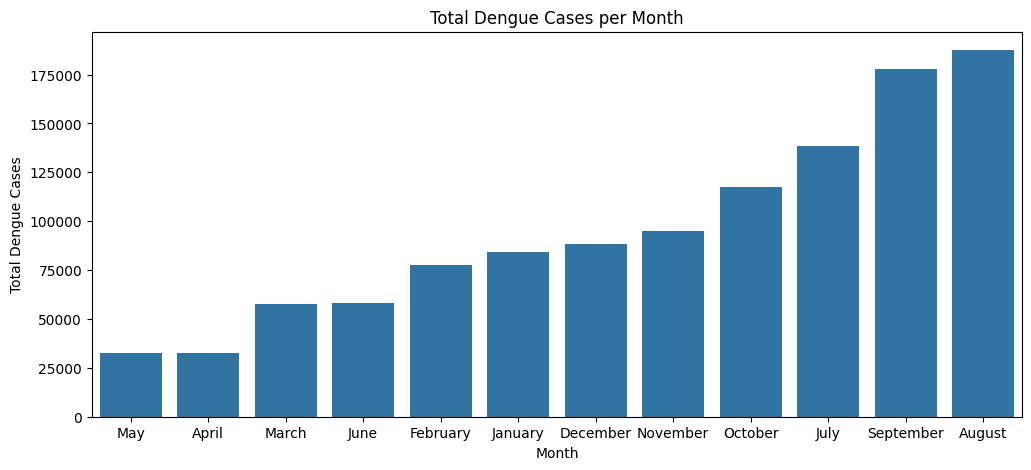

In [6]:
month_case = dengue.groupby('Month')['Dengue_Cases'].sum().sort_values()

plt.figure(figsize=(12, 5))
sns.barplot(x=month_case.index, y=month_case.values)
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.title('Total Dengue Cases per Month')
plt.show()

<h1> INSIGHT NO.3</h1>

<h3>What is the Highest dengue cases over the years? </h3>

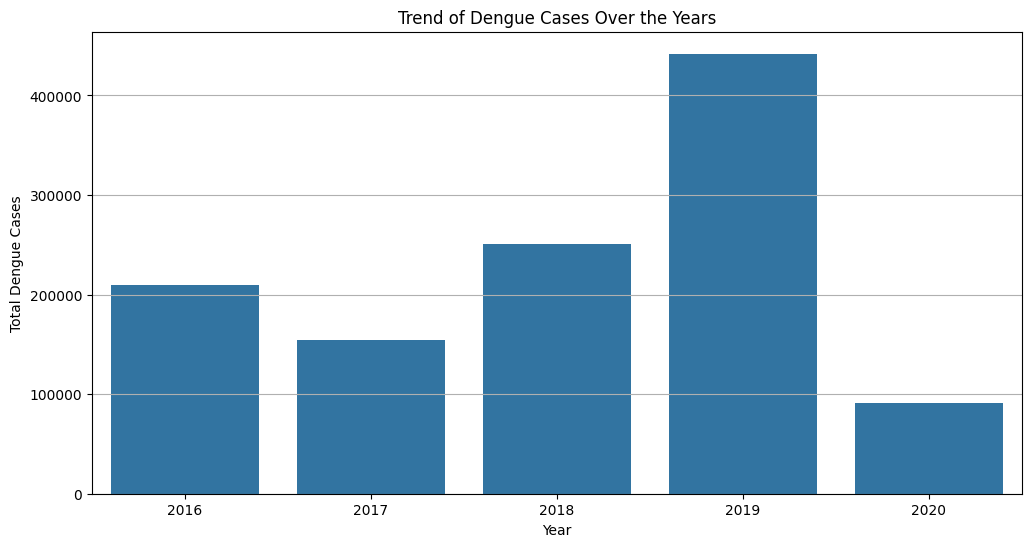

In [7]:
year_case = dengue.groupby('Year')['Dengue_Cases'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_case.index, y=year_case.values)
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.title('Trend of Dengue Cases Over the Years')
plt.grid(axis='y')
plt.show()


<h1> INSIGHT NO.4</h1>

<h3>How are dengue cases and deaths related? </h3>

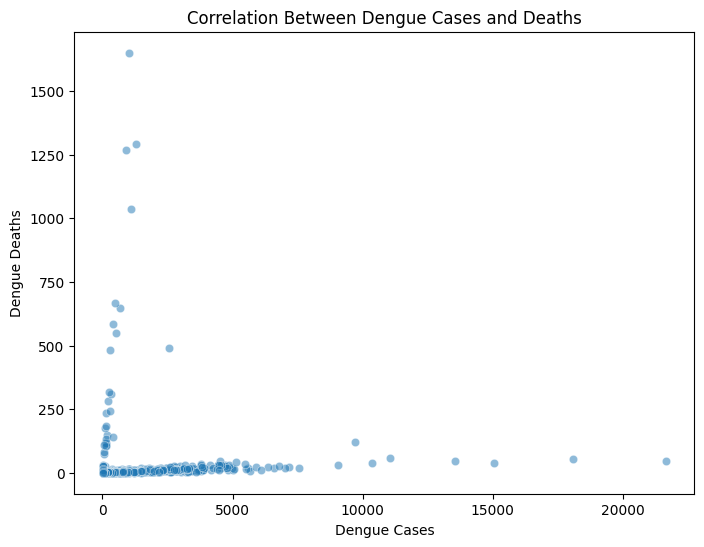

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], alpha=0.5)
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.title('Correlation Between Dengue Cases and Deaths')
plt.show()

<h1> INSIGHT NO.5</h1>

<h3>Monthly Pattern of Dengue-Related Deaths Over Time </h3>

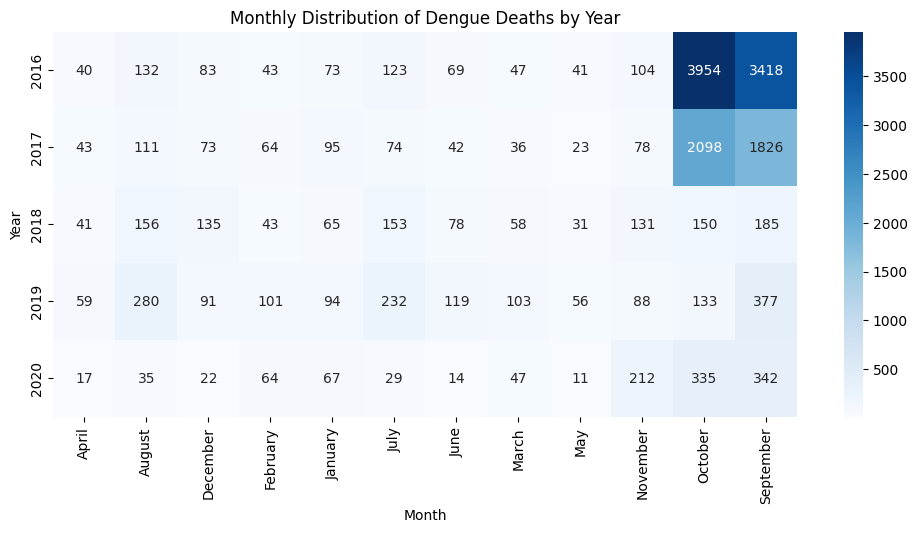

In [9]:
monthly_distribution = dengue.groupby(['Year', 'Month'])['Dengue_Deaths'].sum().unstack()

plt.figure(figsize=(12, 5))
sns.heatmap(monthly_distribution, cmap='Blues', annot=True, fmt='.0f')

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Monthly Distribution of Dengue Deaths by Year')
plt.show()

<h1> INSIGHT NO.5</h1>

<h3>Which year had the highest proportion of dengue cases?

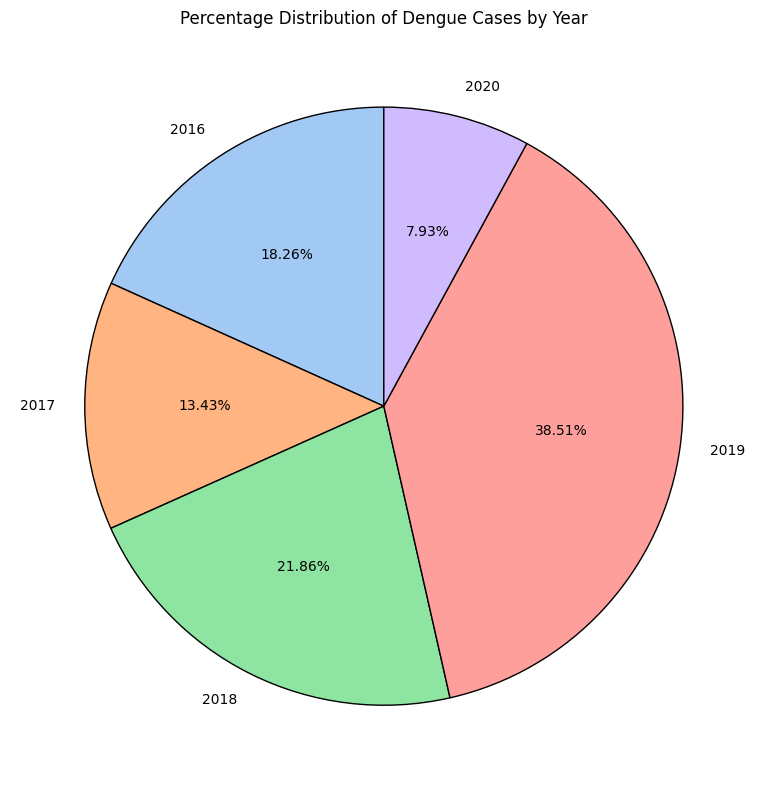

In [10]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
percentages = (yearly_cases / yearly_cases.sum()) * 100
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(yearly_cases)]
plt.pie(percentages,labels=yearly_cases.index.astype(str), autopct='%1.2f%%', startangle=90, colors=colors,wedgeprops={'edgecolor': 'black'})
plt.title("Percentage Distribution of Dengue Cases by Year")
plt.tight_layout()
plt.show()


<h1> INSIGHT NO.7</h1>

<h3>What factors might have contributed to the significant decline in dengue-related deaths from 2016 to 2020? </h3>

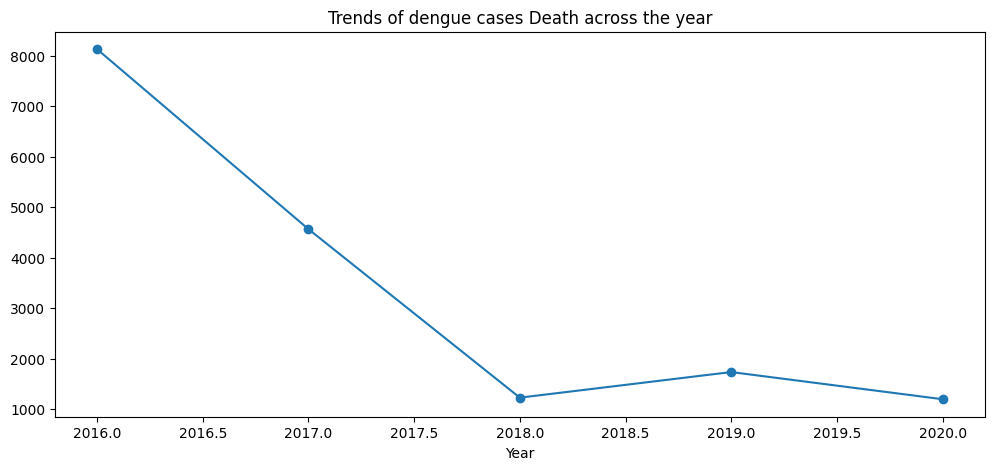

In [11]:
year_death = dengue.groupby(['Year'])['Dengue_Deaths'].sum()
plt.figure(figsize=(12,5))
plt.title('Trends of dengue cases Death across the year')
year_death.plot(kind='line',marker='o')
plt.show()

<h1> INSIGHT NO.8</h1>

<h3>Which months experience the highest number of dengue-related deaths, and why might this be the case?</h3>

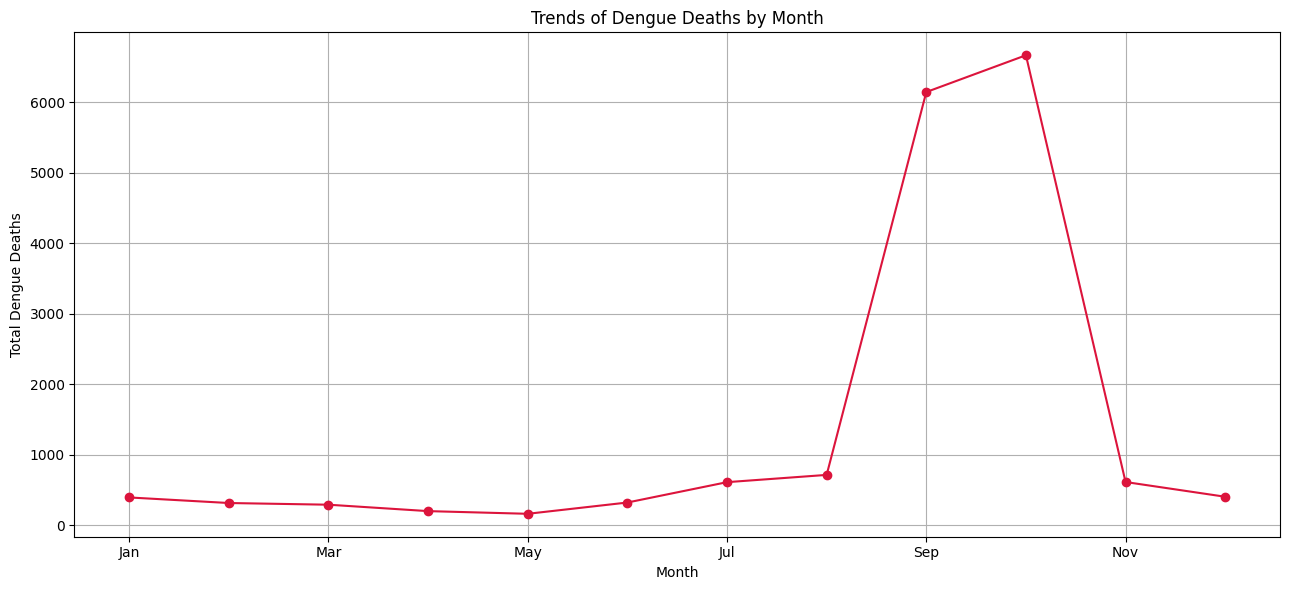

In [12]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

dengue['Month'] = dengue['Month'].map(month_mapping)
year_death = dengue.groupby(['Month'])['Dengue_Deaths'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

year_death.index = year_death.index.map(lambda x: month_names[x - 1])

plt.figure(figsize=(13, 6))
plt.title('Trends of Dengue Deaths by Month')
year_death.plot(kind='line', marker='o', color='crimson')
plt.xlabel('Month')
plt.ylabel('Total Dengue Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


<h1> INSIGHT NO.9</h1>

<h3>Average Dengue Cases and Deaths per Region</h3>

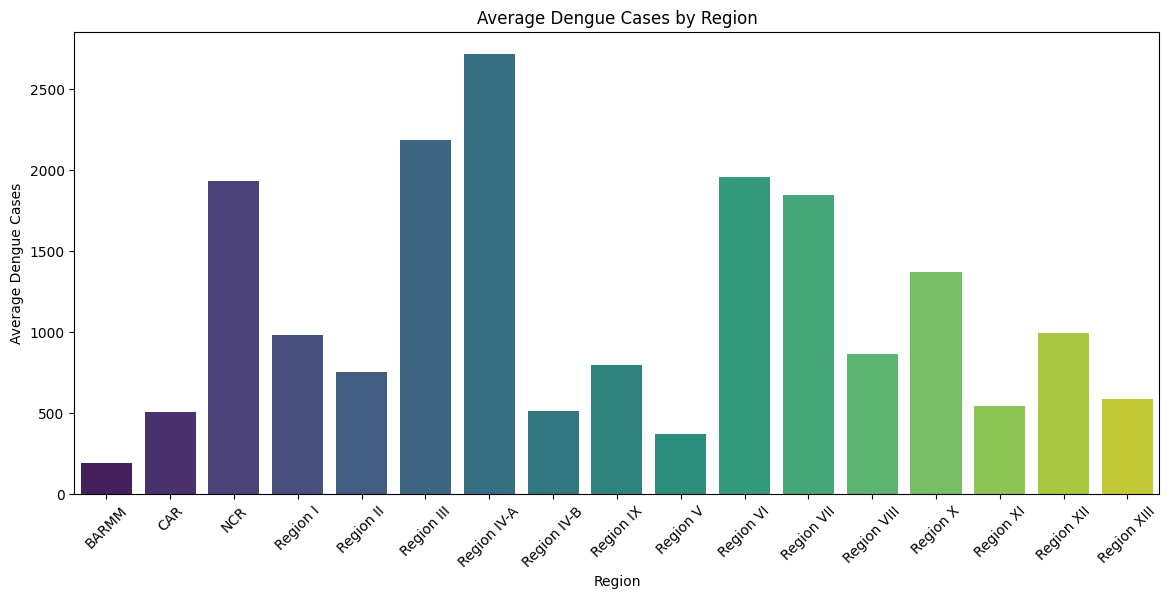

In [13]:

average_cases_deaths_region = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].mean()

plt.figure(figsize=(14, 6))
sns.barplot(x=average_cases_deaths_region.index, y=average_cases_deaths_region['Dengue_Cases'], palette='viridis')
plt.title('Average Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Average Dengue Cases')
plt.xticks(rotation=45)
plt.show()


<h1> INSIGHT NO.10</h1>

<h3>Regional Comparison of Dengue Deaths</h3>

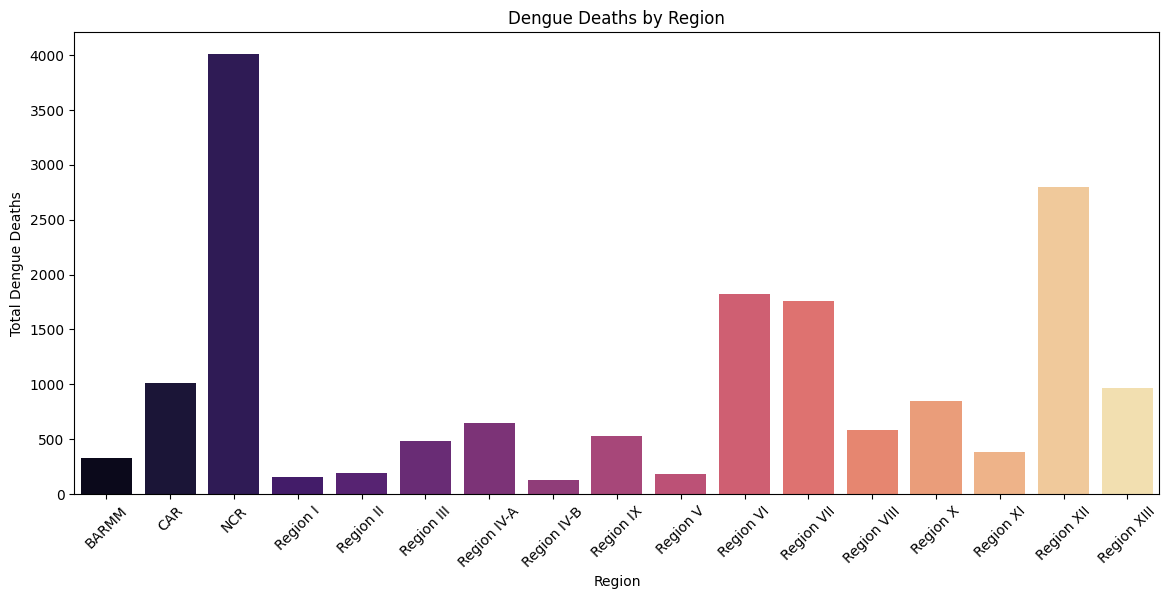

In [14]:
# Group by region and sum the deaths
regional_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum()

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x=regional_deaths.index, y=regional_deaths.values, palette='magma')
plt.title('Dengue Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Total Dengue Deaths')
plt.xticks(rotation=45)
plt.show()


<h1> INSIGHT NO.11</h1>

<h3>Heatmap of Dengue Cases vs. Deaths by Region and Year</h3>

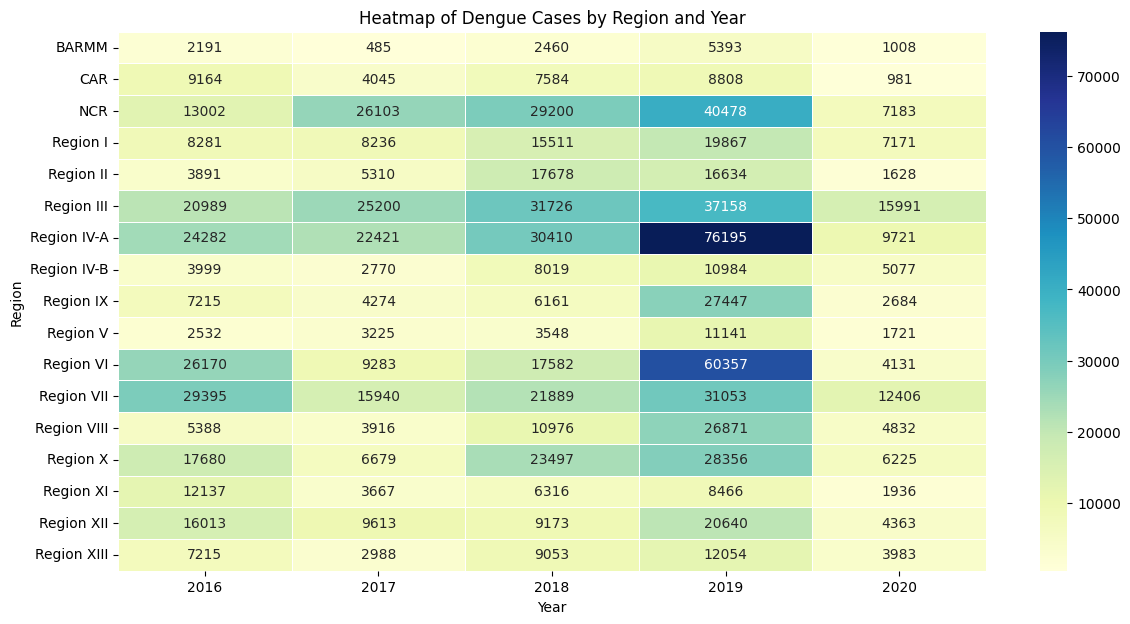

In [15]:
# Pivot the data to create a heatmap-friendly structure
region_yearly_data = dengue.pivot_table(values='Dengue_Cases', index='Region', columns='Year', aggfunc='sum')

# Plotting
plt.figure(figsize=(14, 7))
sns.heatmap(region_yearly_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Dengue Cases by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()


<h1> INSIGHT NO.12</h1>

<h3>Histograms of Dengue Cases by Month</h3>

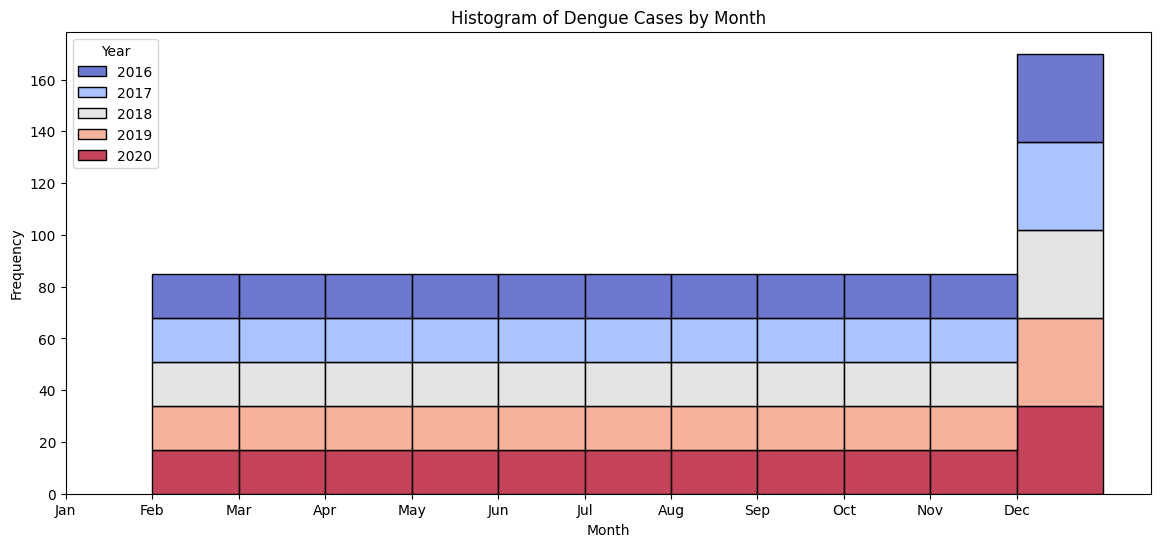

In [16]:
# Plotting a histogram for dengue cases by month
plt.figure(figsize=(14, 6))
sns.histplot(dengue, x='Month', hue='Year', multiple='stack', palette='coolwarm', kde=False)
plt.title('Histogram of Dengue Cases by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


<h1> INSIGHT NO. 13</h1>

<h3>How do dengue cases fluctuate across months in each region from 2016 to 2020?</h3>

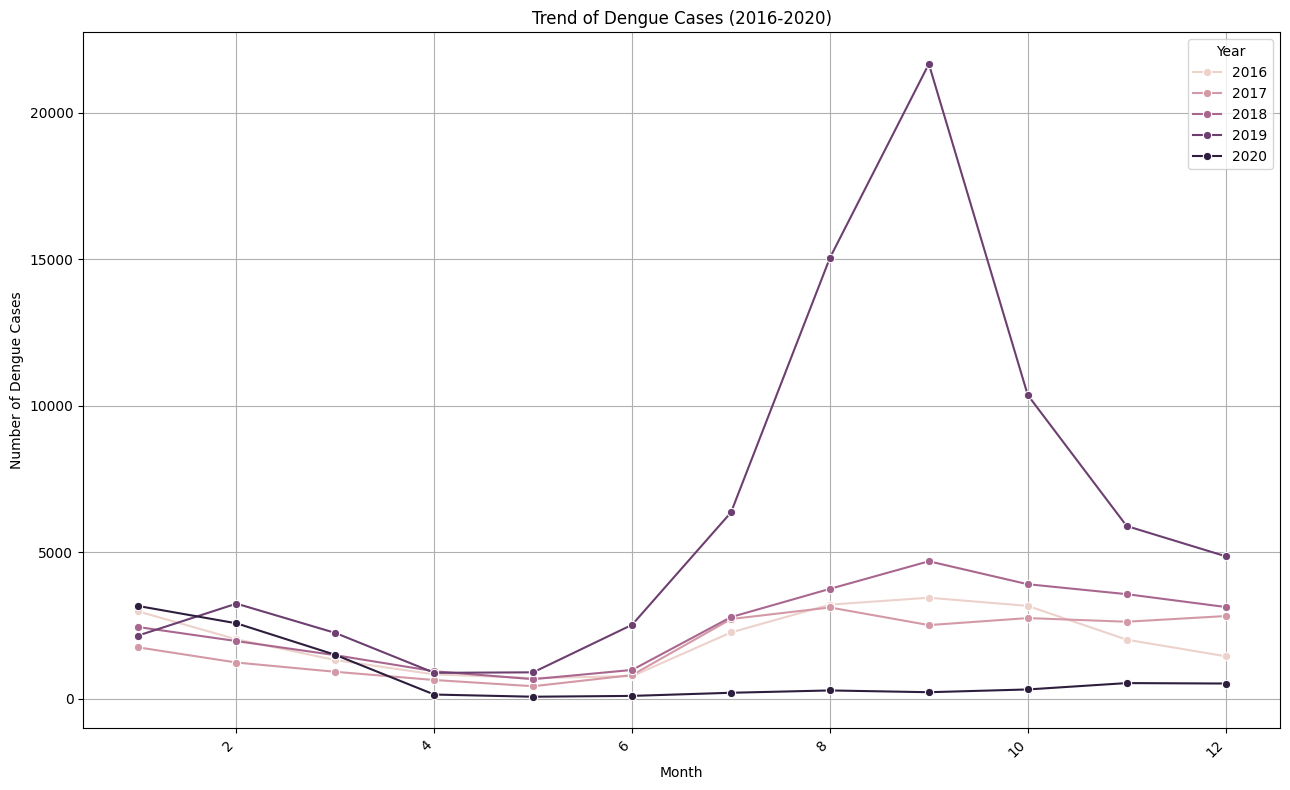

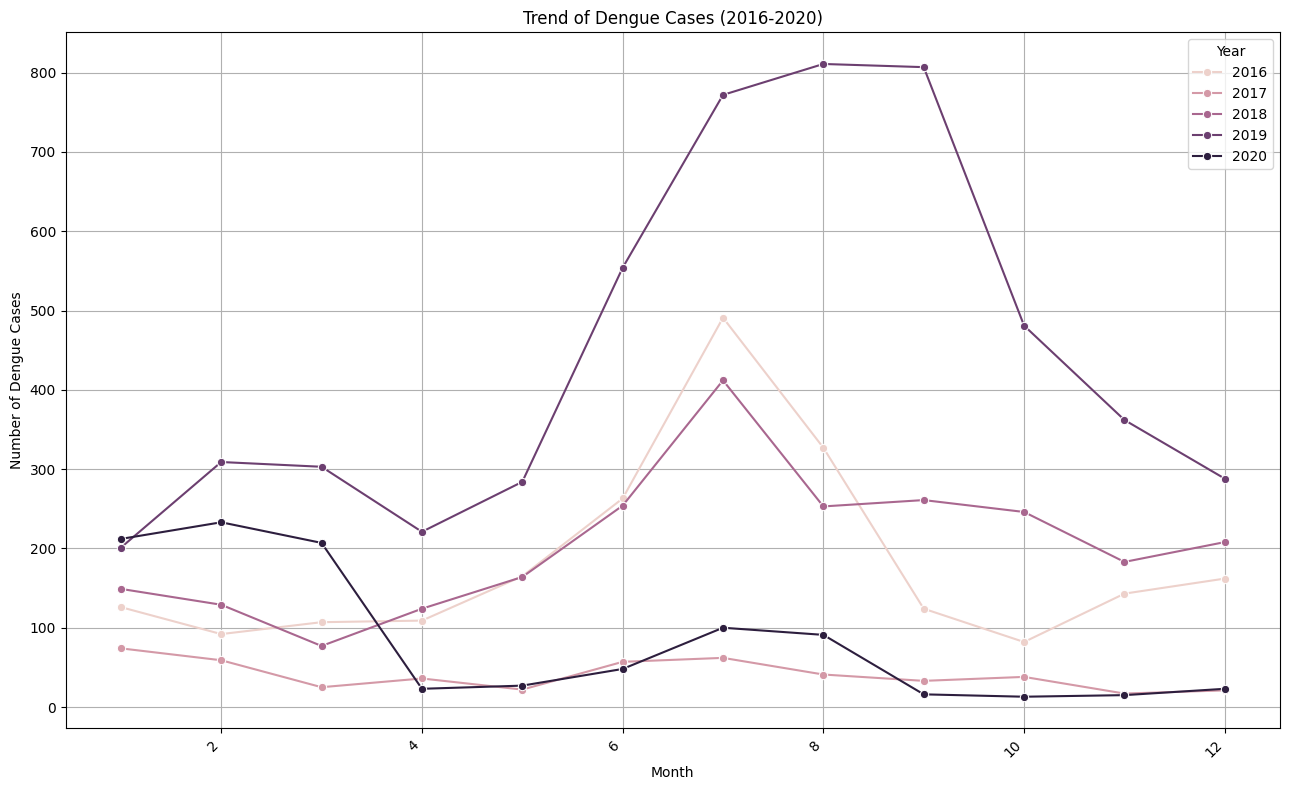

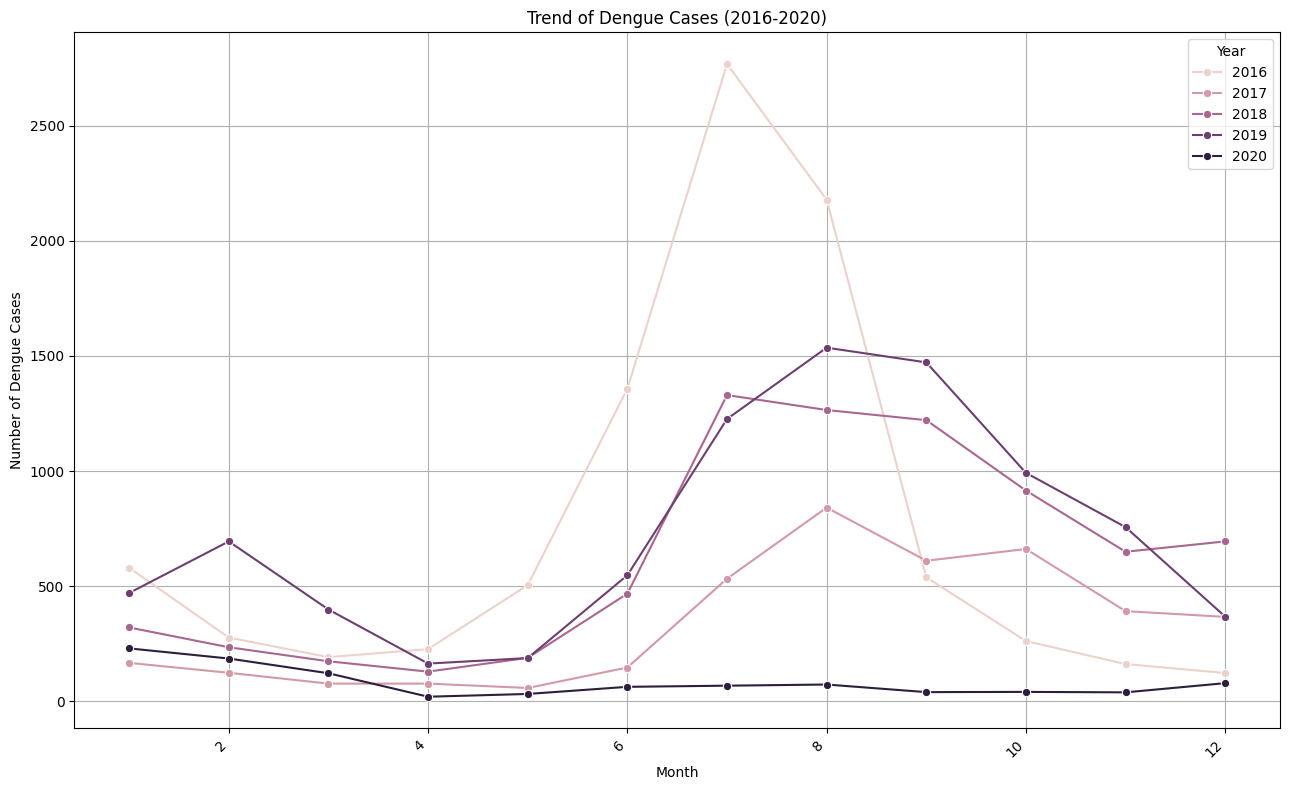

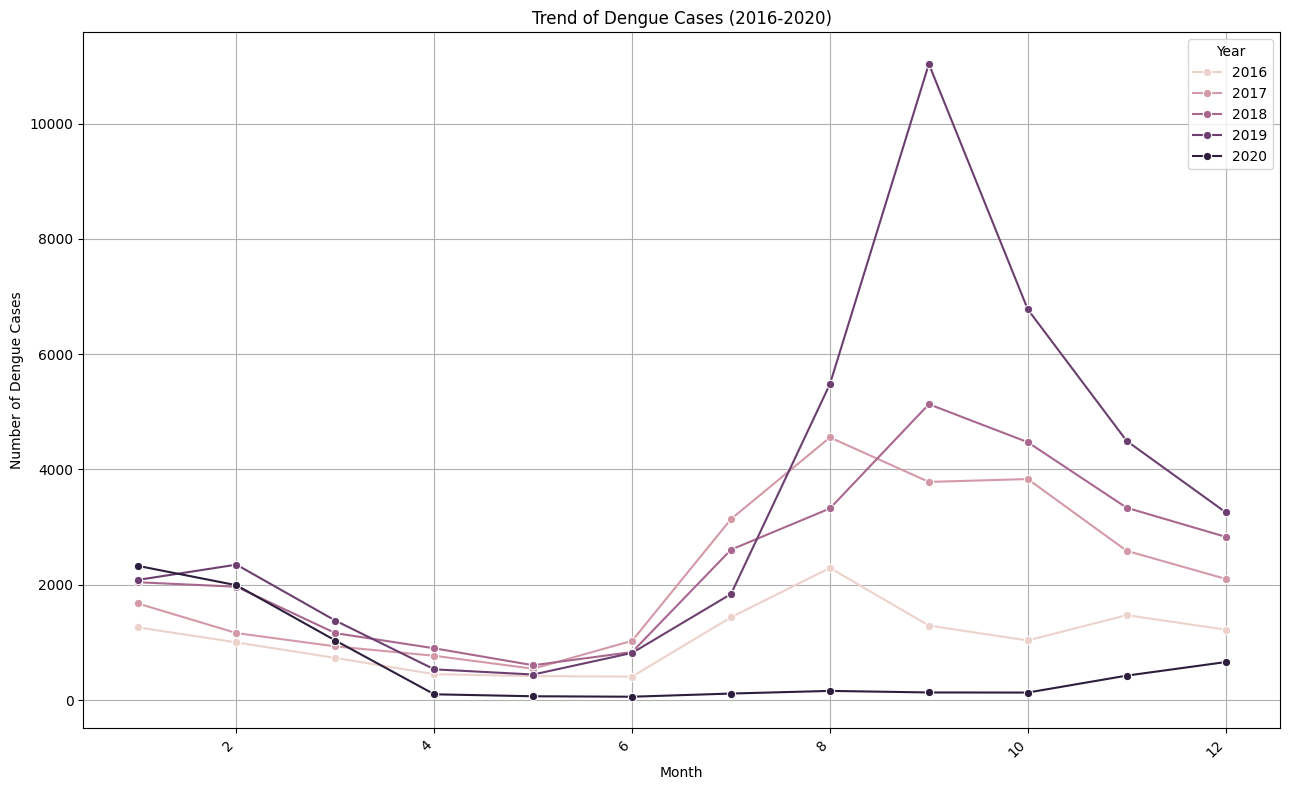

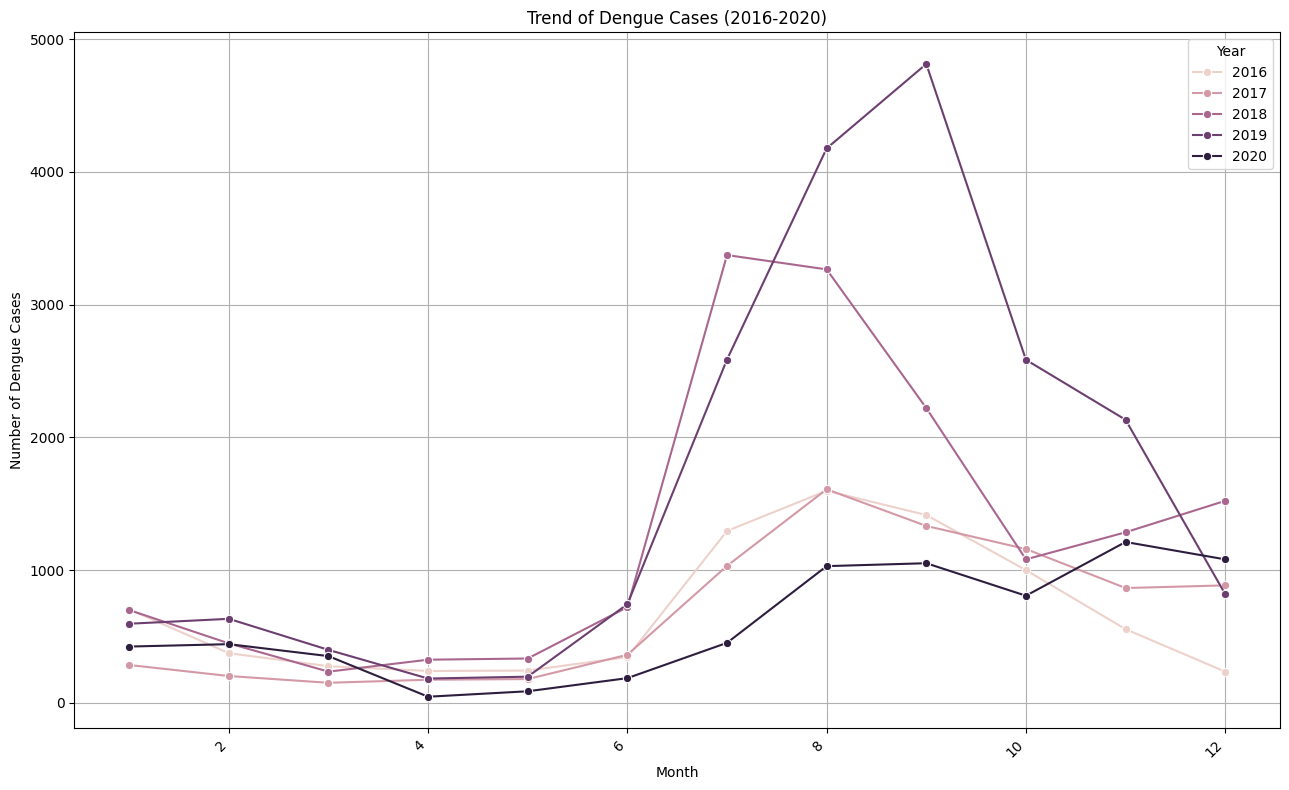

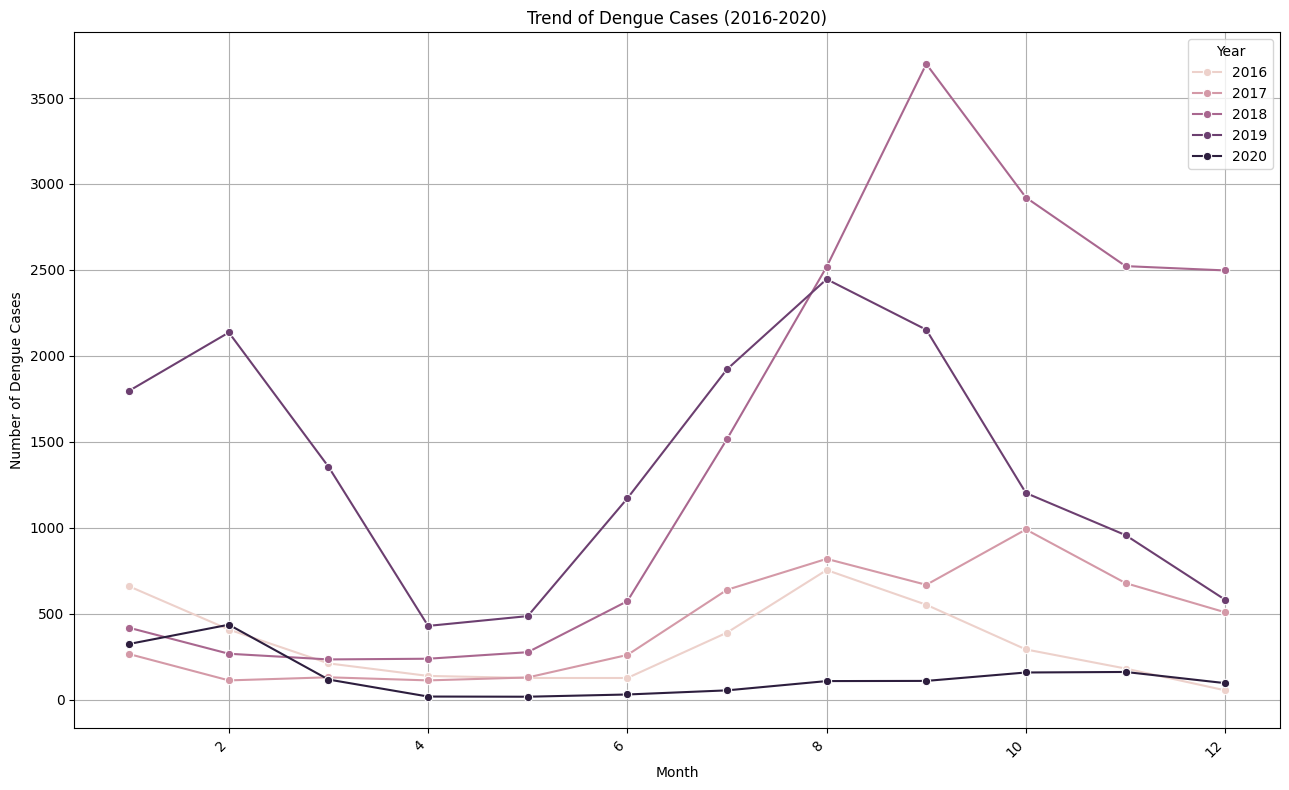

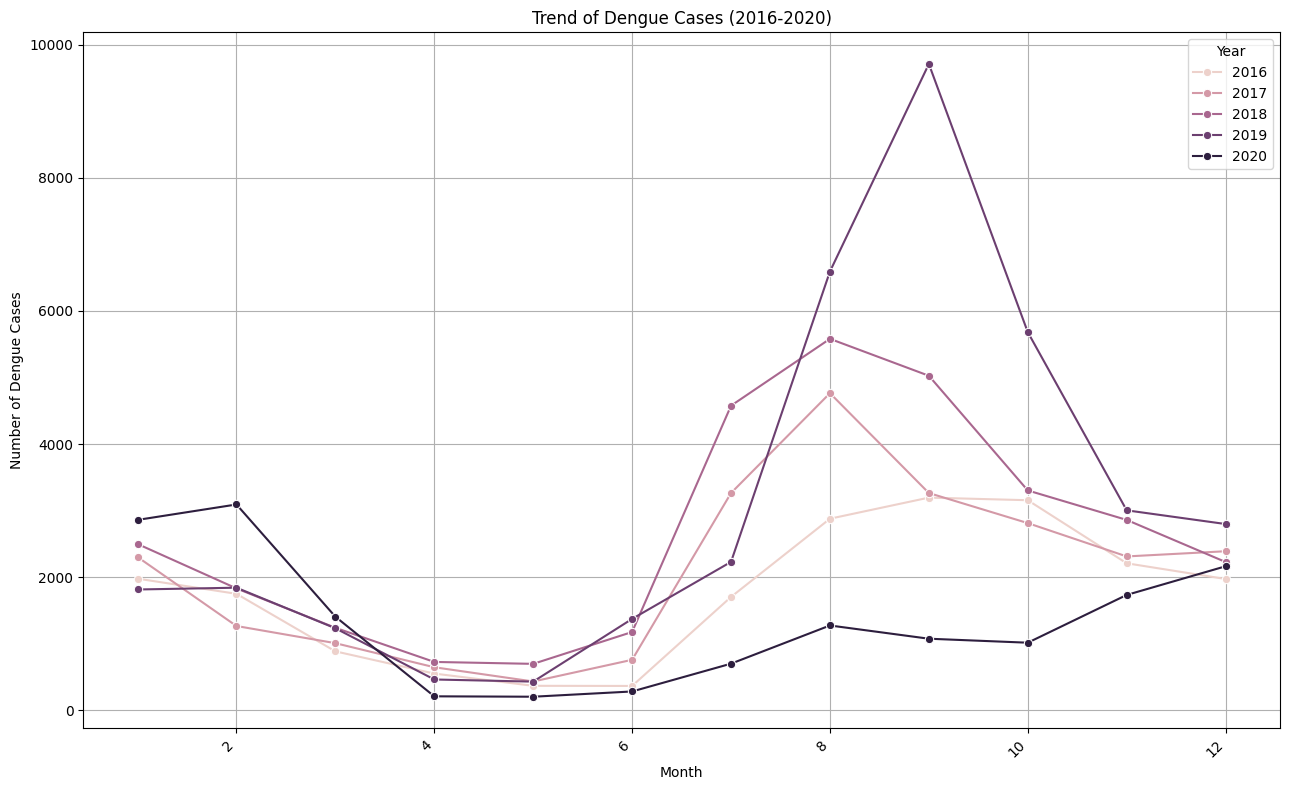

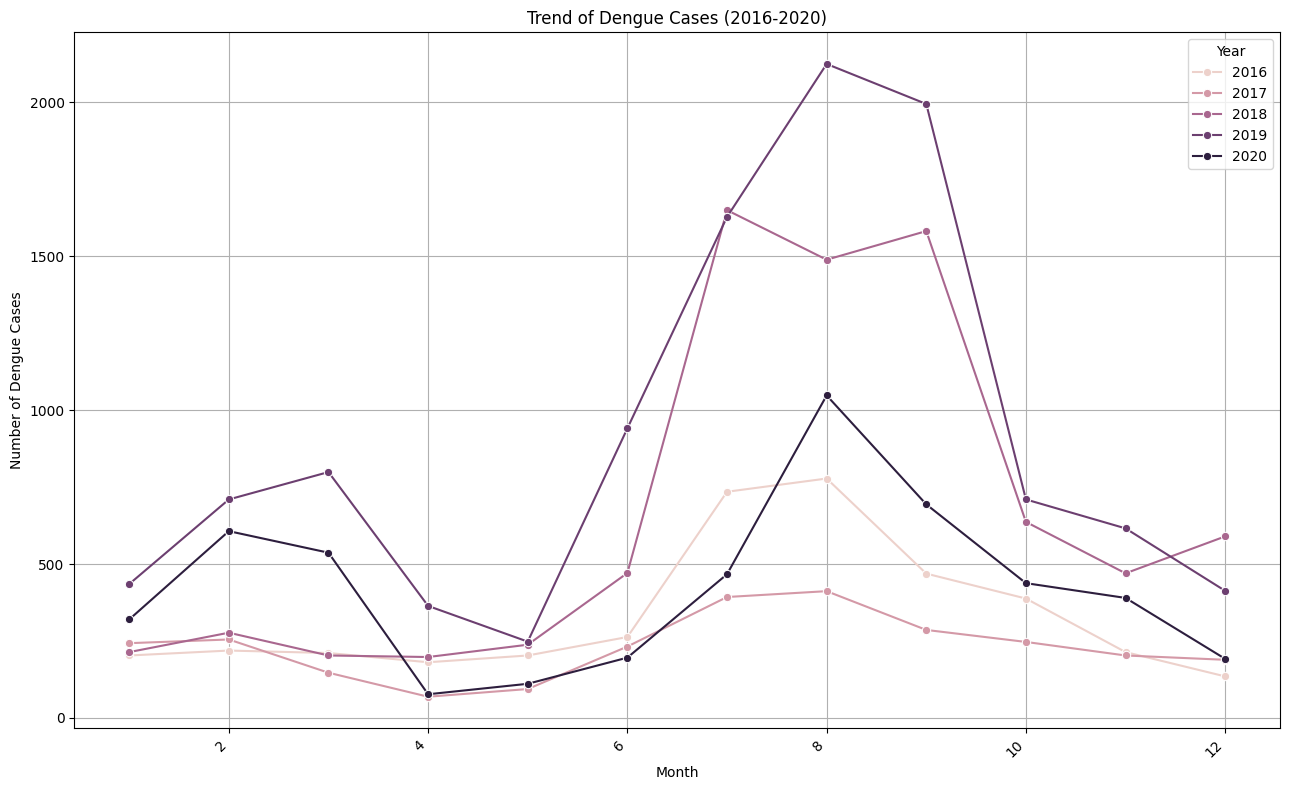

TypeError: 'NoneType' object is not iterable

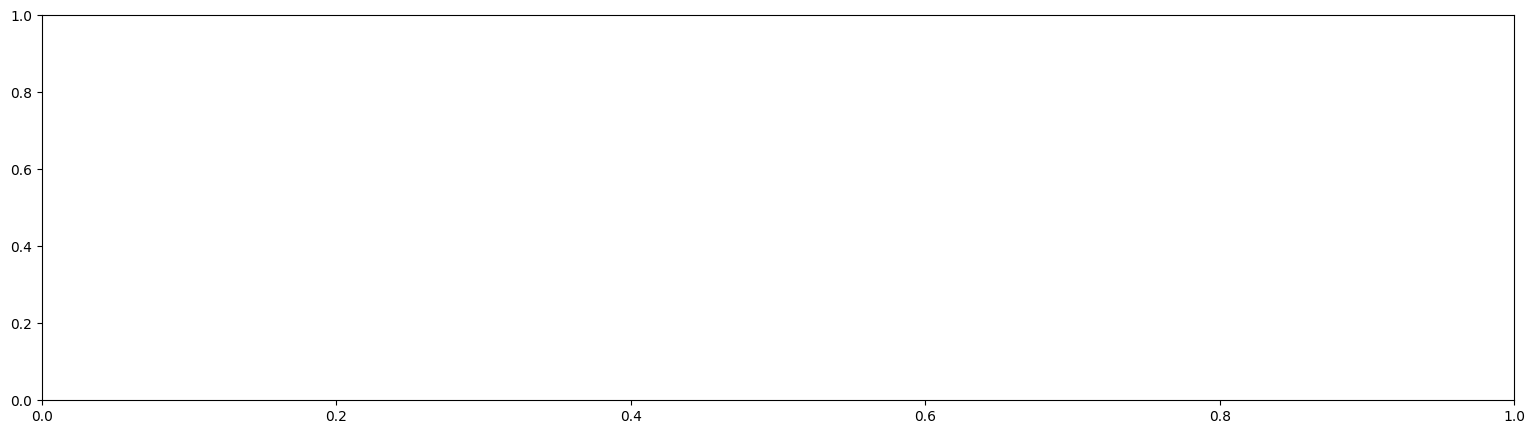

In [17]:
regions =['Region IV-A','BARMM','CAR','NCR',
        'Region I','Region II','Region III','Region IV-B',
         'Region IX Region','Region V','Region VI','Region VII',
         'Region VIII','Region X','Region XI','Region XII','Region XIII']

for region in regions:
    region_data = dengue[dengue['Region'] == region]

    plt.figure(figsize=(19, 5))
    sns.lineplot( data=region_data, x='Month', y='Dengue_Cases', hue='Year',marker='o')
    plt.gcf().set_size_inches(13, 8)
    plt.title('Trend of Dengue Cases (2016-2020)')
    plt.xlabel('Month')
    plt.ylabel('Number of Dengue Cases')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<h1> INSIGHT NO. 14</h1>

<h3>Dengue Cases vs. Deaths Relationship</h3>

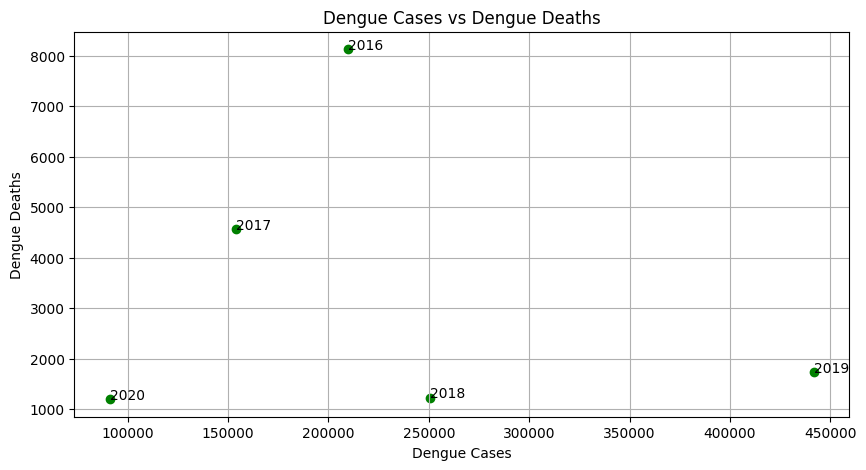

In [18]:
# Sum by year
yearly_data = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(yearly_data['Dengue_Cases'], yearly_data['Dengue_Deaths'], color='green')
for year in yearly_data.index:
    plt.annotate(str(year), 
                 (yearly_data.loc[year, 'Dengue_Cases'], 
                  yearly_data.loc[year, 'Dengue_Deaths']))
plt.title('Dengue Cases vs Dengue Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.grid(True)
plt.show()


<h1> INSIGHT NO. 14</h1>

<h3>Total Dengue Cases and Deaths by Region</h3>

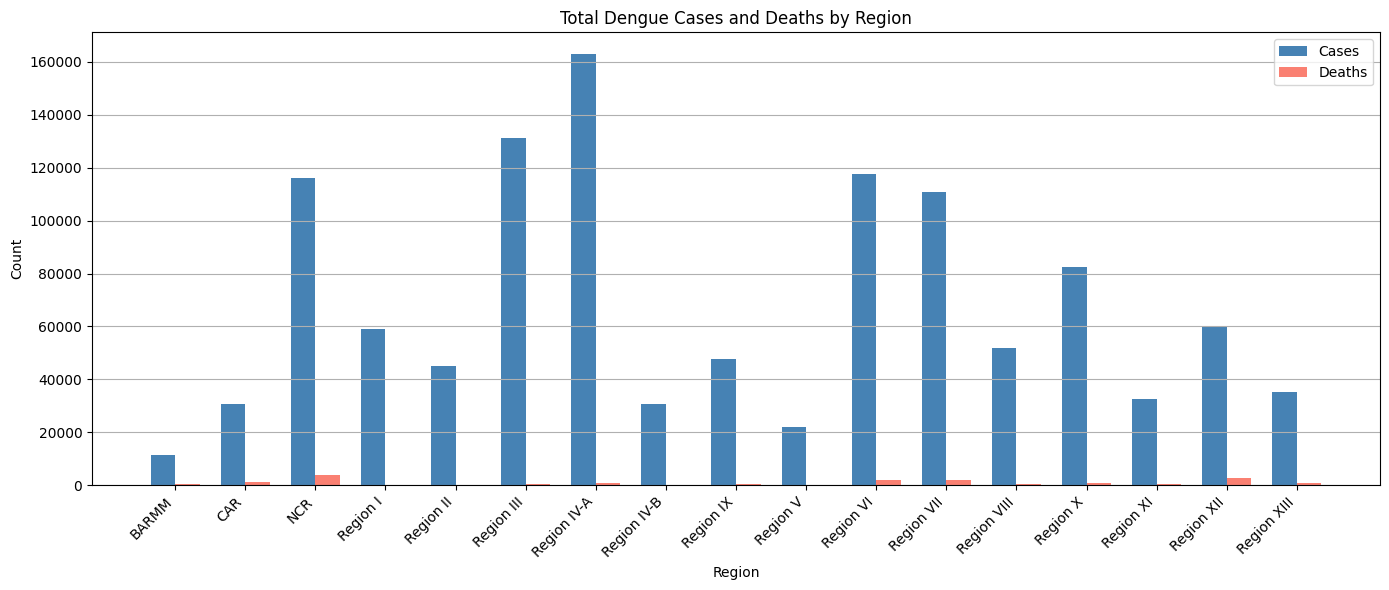

In [24]:
import numpy as np

region_stats = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
x = np.arange(len(region_stats))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, region_stats['Dengue_Cases'], width, label='Cases', color='steelblue')
plt.bar(x + width/2, region_stats['Dengue_Deaths'], width, label='Deaths', color='salmon')
plt.xticks(x, region_stats.index, rotation=45, ha='right')
plt.title('Total Dengue Cases and Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


<h1> INSIGHT NO. 14</h1>

<h3>Are there specific months when dengue cases peak in Region IV-A across the years?</h3>

In [25]:
region_4a = dengue[dengue['Region'] == 'Region IV-A']
region_barmm = dengue[dengue['Region'] == 'BARMM']
region_car = dengue[dengue['Region'] == 'CAR']
region_ncr = dengue[dengue['Region'] == 'NCR']
region1 = dengue[dengue['Region'] == 'Region I']
region2 = dengue[dengue['Region'] == 'Region II']
region3 = dengue[dengue['Region'] == 'Region III']
region4b = dengue[dengue['Region'] == 'Region IV-B']
region9 = dengue[dengue['Region'] == 'Region IX Region']
region5 = dengue[dengue['Region'] == 'Region V']
region6 = dengue[dengue['Region'] == 'Region VI']
region7 = dengue[dengue['Region'] == 'Region VII']
region8 = dengue[dengue['Region'] == 'Region VIII']
region10 = dengue[dengue['Region'] == 'Region X']
region11 = dengue[dengue['Region'] == 'Region XI']
region12 = dengue[dengue['Region'] == 'Region XII']
region13 = dengue[dengue['Region'] == 'Region XIII']

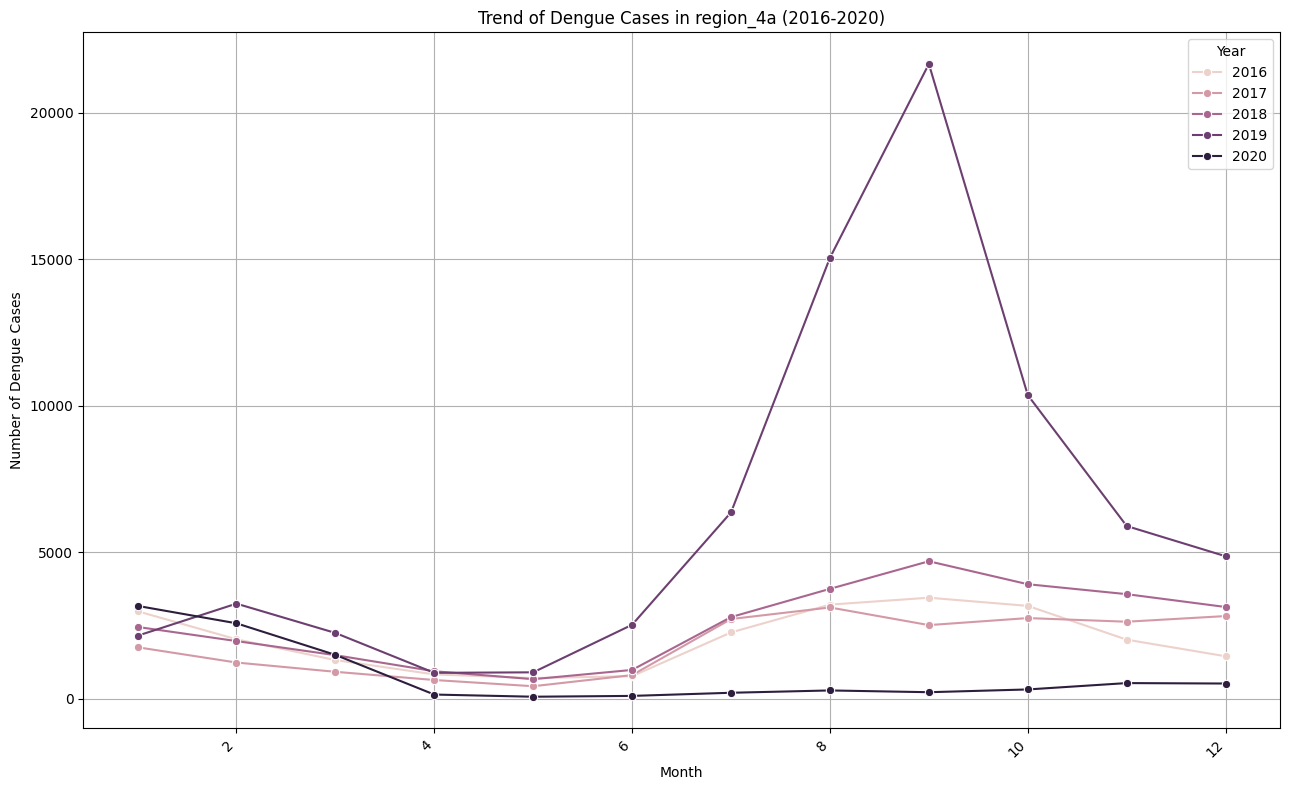

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=region_4a, x='Month', y='Dengue_Cases', hue='Year',marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases in region_4a (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

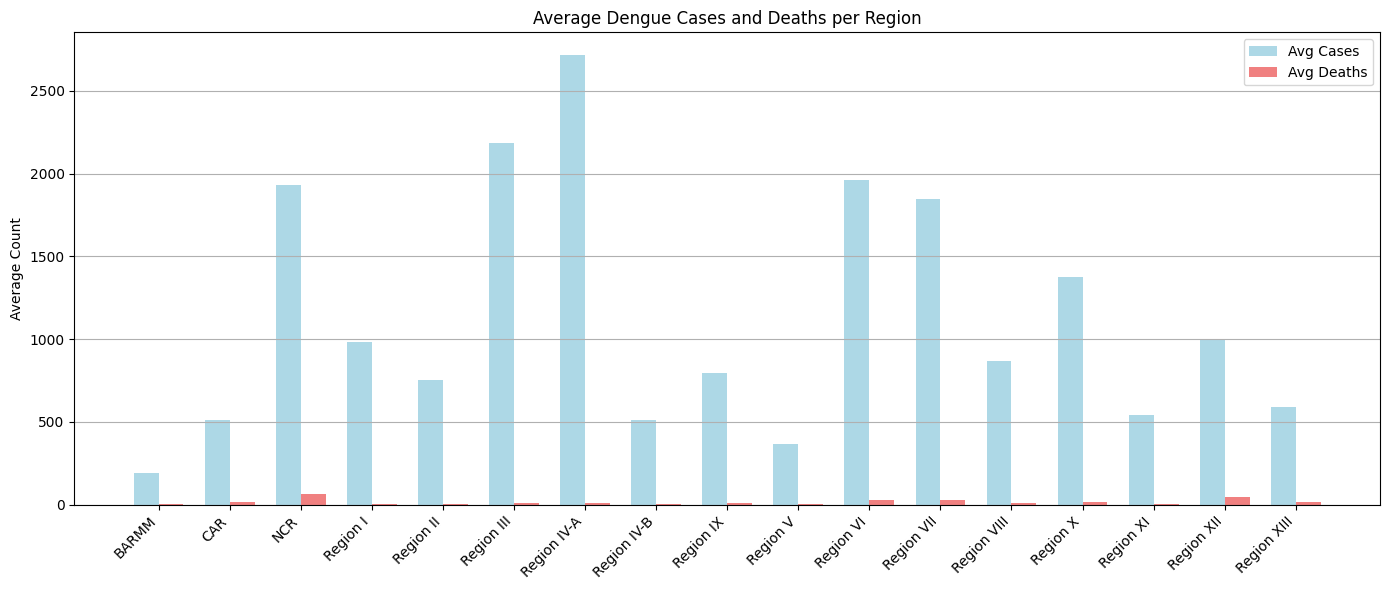

In [27]:
avg_stats = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].mean()

x = np.arange(len(avg_stats))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, avg_stats['Dengue_Cases'], width, label='Avg Cases', color='lightblue')
plt.bar(x + width/2, avg_stats['Dengue_Deaths'], width, label='Avg Deaths', color='lightcoral')
plt.xticks(x, avg_stats.index, rotation=45, ha='right')
plt.title('Average Dengue Cases and Deaths per Region')
plt.ylabel('Average Count')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [43]:

dengue_clean = dengue.dropna(subset=['Year', 'Month', 'Dengue_Cases', 'Dengue_Deaths'])


dengue_clean['Year'] = dengue_clean['Year'].astype(int)
dengue_clean['Month'] = dengue_clean['Month'].astype(int)


dengue_clean['Case_Fatality_Rate'] = (dengue_clean['Dengue_Deaths'] / dengue_clean['Dengue_Cases']).replace([float('inf'), -float('inf')], 0).fillna(0)
dengue_clean['YearMonth'] = pd.to_datetime(dengue_clean['Year'].astype(str) + '-' + dengue_clean['Month'].astype(str) + '-01')
dengue_clean['Severity_Level'] = pd.cut(dengue_clean['Dengue_Cases'],
                                        bins=[0, 100, 500, 1000, float('inf')],
                                        labels=['Low', 'Moderate', 'High', 'Very High'])

# Preview the result
dengue_clean.head()


,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Case_Fatality_Rate,CFR,YearMonth,Severity_Level


In [44]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Case_Fatality_Rate,CFR
0,NaN,2016,Region I,705,1,0.001418,0.001418
1,NaN,2016,Region I,374,0,0.000000,0.000000
2,NaN,2016,Region I,276,0,0.000000,0.000000
3,NaN,2016,Region I,240,2,0.008333,0.008333
4,NaN,2016,Region I,243,1,0.004115,0.004115
...,...,...,...,...,...,...,...
1015,NaN,2020,BARMM,91,0,0.000000,0.000000
1016,NaN,2020,BARMM,16,8,0.500000,0.500000
1017,NaN,2020,BARMM,13,9,0.692308,0.692308
1018,NaN,2020,BARMM,15,1,0.066667,0.066667


<h1> INSIGHT NO. 15</h1>

<h3>Which region has the highest average case fatality rate (CFR)?</h3>

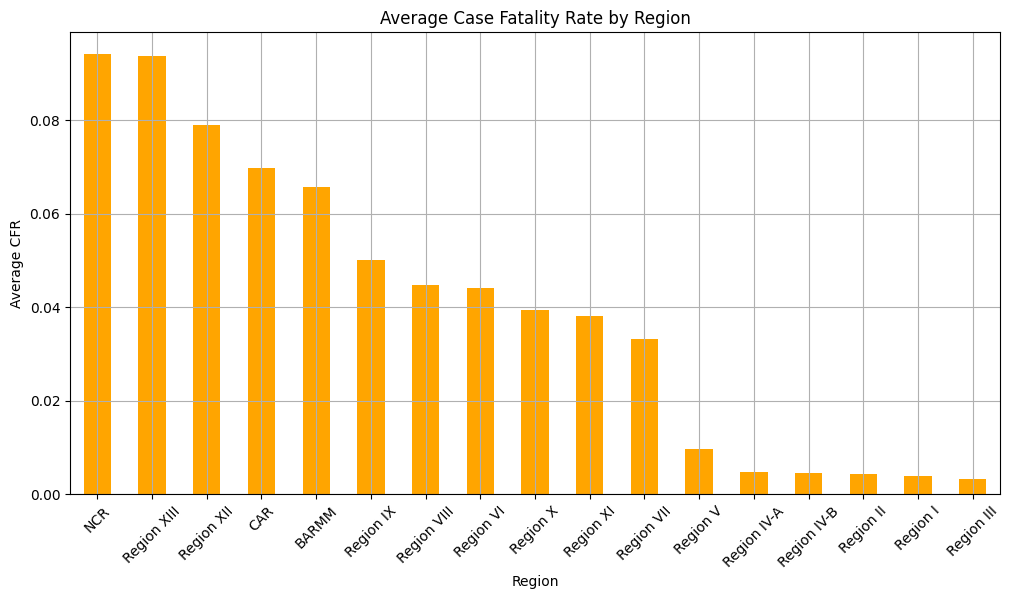

In [45]:
region_cfr = dengue.groupby('Region')['Case_Fatality_Rate'].mean()

plt.figure(figsize=(12, 6))
region_cfr.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Case Fatality Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average CFR')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h1> INSIGHT NO. 16</h1>

<h3>What is the case fatality rate per severity level?</h3>

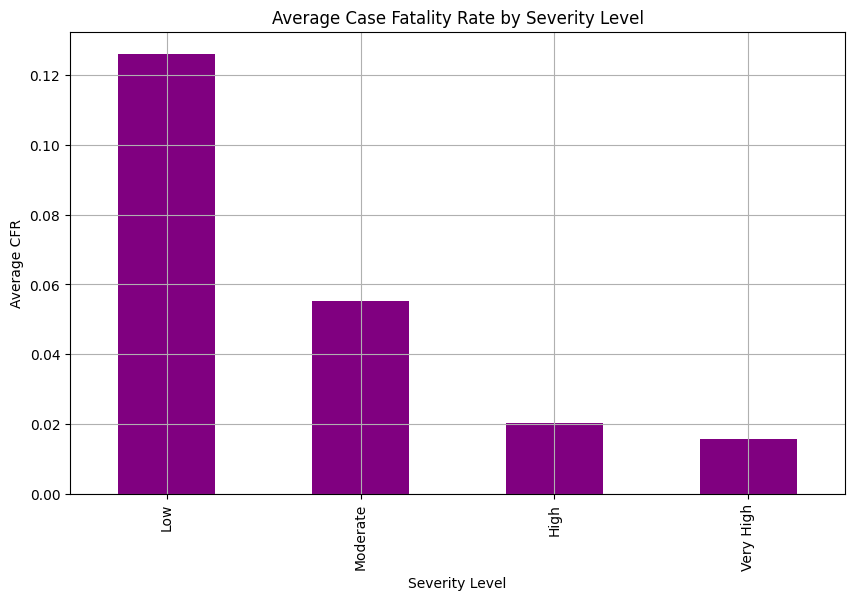

In [50]:
severity_cfr = dengue.groupby('Severity_Level')['Case_Fatality_Rate'].mean()

plt.figure(figsize=(10, 6))
severity_cfr.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Average Case Fatality Rate by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Average CFR')
plt.grid(True)
plt.show()


<h1> INSIGHT NO. 17</h1>

<h3>How do dengue cases and deaths relate to the case fatality rate across months?</h3>

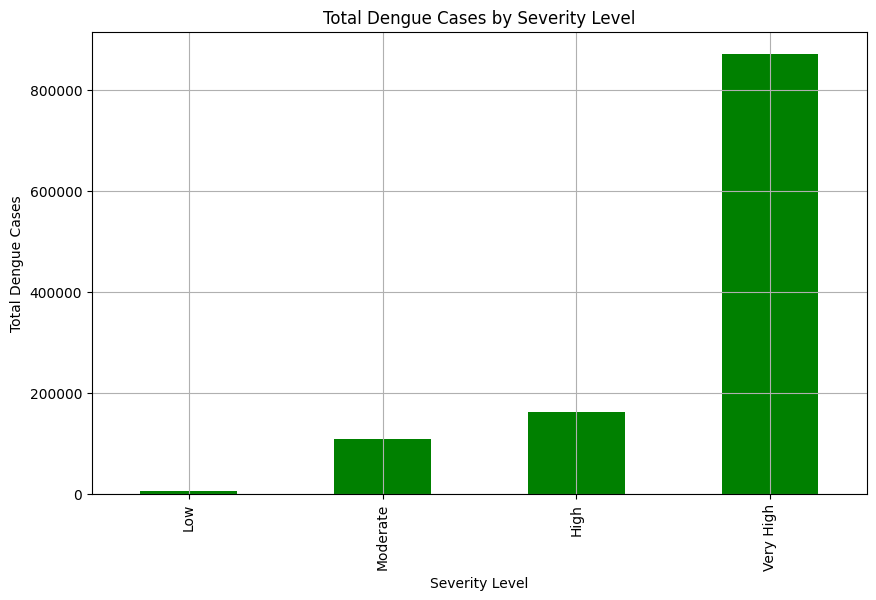

In [52]:
severity_cases = dengue.groupby('Severity_Level')['Dengue_Cases'].sum()

plt.figure(figsize=(10, 6))
severity_cases.plot(kind='bar', color='green')
plt.title('Total Dengue Cases by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.show()


<h1> INSIGHT NO. 18</h1>

<h3>What is the distribution of dengue cases across different severity levels (Low, Moderate, High, Very High)?</h3>

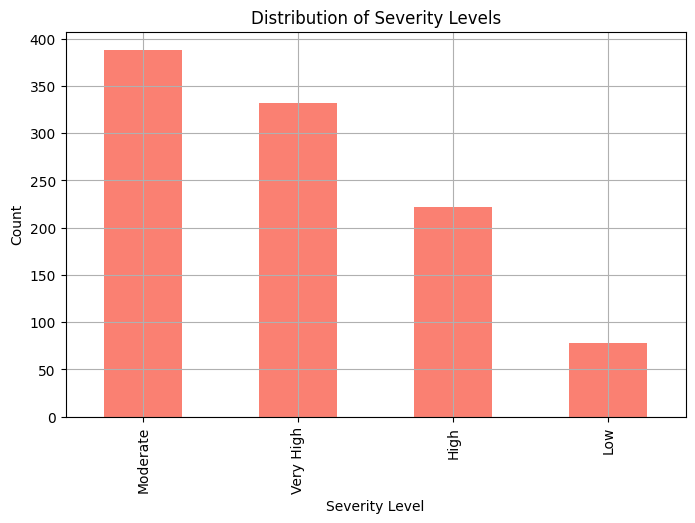

In [54]:
dengue['Severity_Level'] = pd.cut(dengue['Dengue_Cases'],
                                   bins=[0, 100, 500, 1000, float('inf')],
                                   labels=['Low', 'Moderate', 'High', 'Very High'])
severity_counts = dengue['Severity_Level'].value_counts()

plt.figure(figsize=(8, 5))
severity_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()


<h1> INSIGHT NO. 19</h1>

<h3>What is the percentage of dengue cases for each severity level?</h3>

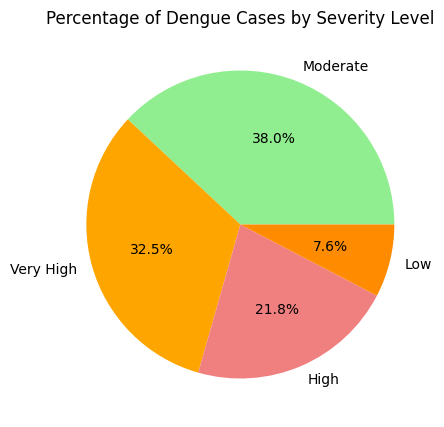

In [55]:
severity_percentage = dengue['Severity_Level'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
severity_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'orange', 'lightcoral', 'darkorange'])
plt.title('Percentage of Dengue Cases by Severity Level')
plt.ylabel('')
plt.show()


<h1> INSIGHT NO. 20</h1>

<h3>How does the total number of dengue cases change for each severity level over the years?</h3>

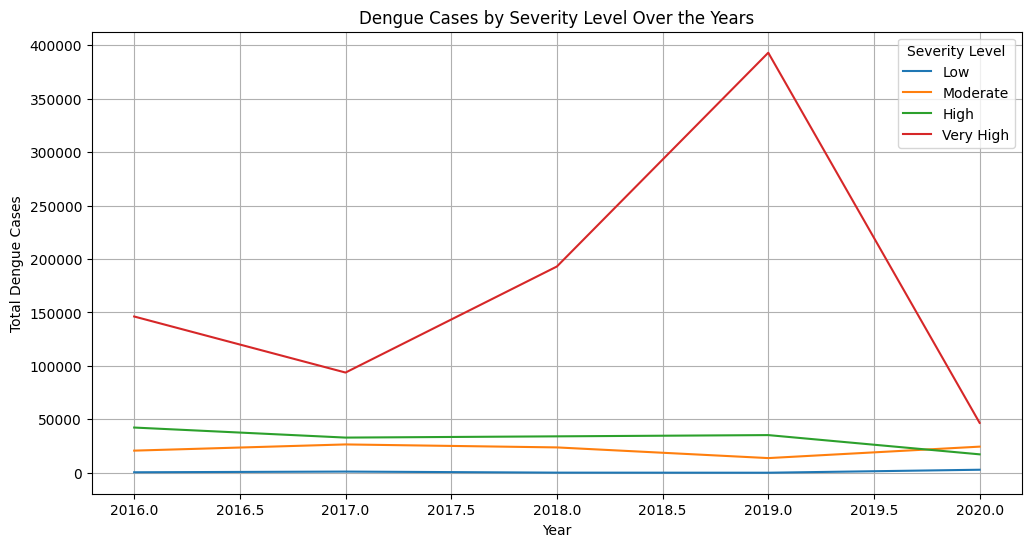

In [56]:
yearly_severity_cases = dengue.groupby(['Year', 'Severity_Level'])['Dengue_Cases'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_severity_cases, dashes=False)
plt.title('Dengue Cases by Severity Level Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.legend(title='Severity Level')
plt.grid(True)
plt.show()
